### **Heart Disease Prediction Project**
Goal: Test Different Machine Learning Algorithms against each other to determine the best model for predicting heart disease in patients
 - **Datasets Used**
    - Heart Disease Dataset (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)
    - Heart Failure Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
- **Machine Learning Techniques Used**
   - Logistic Regression
   - Random Forest
   - K-Nearest-Neighbors
- **Packages Used**
   - pandas
   - matplotlib
   - seaborn
   - sklearn
    

In [65]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Set display options
pd.set_option('display.max_columns', None)

# Set plot styles
sns.set_theme()

### **Import and exmaine both datasets to be used within machine learning models.**

In [66]:
# Load Dataset
df_disease = pd.read_csv("heart_disease.csv")
df_failure = pd.read_csv("heart_failure_prediction.csv")

# Examine Heart Disease Dataset
print("Heart Disease Dataset Shape:", df_disease.shape)
print("\nFirst few rows of Heart Disease dataset:")
print(df_disease.head())
print("\nColumns in Heart Disease dataset:", df_disease.columns.tolist())

print("\n" + "="*50 + "\n")

# Examine Herat Failure Dataset
print("Heart Failure Dataset Shape:", df_failure.shape)
print("\nFirst few rows of Heart Failure Prediction dataset:")
print(df_failure.head())
print("\nColumns in Heart Failure dataset:", df_failure.columns.tolist())



Heart Disease Dataset Shape: (1025, 14)

First few rows of Heart Disease dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Columns in Heart Disease dataset: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Heart Failure Dataset Shape: (918, 12)

First few rows of Heart Failure Prediction dataset:
   Age Sex ChestPainType  RestingBP  Cholestero

### **Standardize Datasets**
Category Names and how values are entered between the two datasets are roughly the same. However there are some differences, so to help with simplicity when testing models, standardize some of the data.

- Set all column names to be lowercase 
- Match collumn names if not already matched
    - chestpaintype -> cp 
    - fastingbs -> fbs
    - etc.
- Standardize sex encoding to 1 & 0
    - M -> 1
    - F -> 0
- Standardize Chest Pain Type
    - TA -> 0
    - ATA -> 1
    - NAP -> 2
    - ASY -> 3
- Standardize ECG Mapping
    - Normal -> 0
    - ST -> 1
    - LVH -> 2
- Standardize ExerciseAngina encoding
    - Y -> 1
    - N -> 0
- Standardize Slope encoding
    - UP -> 1
    - Flat -> 2
    - Down -> 3

In [67]:
# Goal is to standardize datasets to have the same labels and category names

# Create copies of Datasets to Preserve the Originals
df_disease_std = df_disease.copy()
df_failure_std = df_failure.copy()

# Function to standardize the datasets
def standardize_datasets(disease_df, failure_df):

    # Make column names lowercase
    disease_df.columns = disease_df.columns.str.lower()
    failure_df.columns = failure_df.columns.str.lower()
    
    # Rename heart failure dataset to match heart disease dataset
    failure_df = failure_df.rename(columns={
        'age': 'age',
        'sex': 'sex',
        'chestpaintype': 'cp',
        'restingbp': 'trestbps',
        'cholesterol': 'chol',
        'fastingbs': 'fbs',
        'restingecg': 'restecg',
        'maxhr': 'thalach',
        'exerciseangina': 'exang',
        'oldpeak': 'oldpeak',
        'st_slope': 'slope',
        'heartdisease': 'target'
    })
    
    # Set sex encoding as 1 & 0
    disease_df['sex'] = disease_df['sex'].astype(int)
    failure_df['sex'] = failure_df['sex'].map({'M': 1, 'F': 0})
    
    # Standardize ChestPainType/cp encoding
    # cp: (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
    cp_mapping = {
        'TA': 0,  # Typical Angina
        'ATA': 1, # Atypical Angina
        'NAP': 2, # Non-Anginal Pain
        'ASY': 3  # Asymptomatic
    }
    failure_df['cp'] = failure_df['cp'].map(cp_mapping)
    
    # Standardize RestingECG encoding
    # Original encoding for disease dataset (0: normal, 1: ST-T abnormal, 2: hypertrophy)
    ecg_mapping = {
        'Normal': 0,
        'ST': 1,
        'LVH': 2
    }
    failure_df['restecg'] = failure_df['restecg'].map(ecg_mapping)
    
    # Standardize ExerciseAngina encoding (1: yes, 0: no)
    failure_df['exang'] = failure_df['exang'].map({'Y': 1, 'N': 0})
    
    # Standardize Slope encoding
    slope_mapping = {
        'Up': 1,
        'Flat': 2,
        'Down': 3
    }
    failure_df['slope'] = failure_df['slope'].map(slope_mapping)
    
    # Convert all columns to numeric
    for col in disease_df.columns:
        disease_df[col] = pd.to_numeric(disease_df[col], errors='coerce')
    for col in failure_df.columns:
        failure_df[col] = pd.to_numeric(failure_df[col], errors='coerce')
    
    return disease_df, failure_df

# Apply standardization
df_disease_std, df_failure_std = standardize_datasets(df_disease_std, df_failure_std)

# Compare the results
print("After standardization:")
print("\nHeart Disease Dataset (first few rows):")
print(df_disease_std.head())

print("\n" + "="*80 + "\n")

print("Heart Failure Dataset (first few rows):")
print(df_failure_std.head())

After standardization:

Heart Disease Dataset (first few rows):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


Heart Failure Dataset (first few rows):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   40    1   1       140   289    0        0      172      0      0.0      1   
1   49    0   2       160   180    0        0      156      0      1.0      2   
2   37    1   1       130   283 

### **Logistic Regression Model**

In [68]:
# Prepare and train logistic regression models for both datasets

# For Heart Disease Dataset (Use Standardize version of data)
X_hdisease = df_disease_std.drop(['target'], axis=1)
y_hdisease = df_disease_std['target']

# For Heart Failure Dataset (Use Standardize version of data)
X_hfailure = df_failure_std.drop(['target'], axis=1)
y_hfailure = df_failure_std['target']

# Split both datasets into train and test sets
#   (Using standard 80 / 20 split and random state of 42 to keep consistent results)
X_hdisease_train, X_hdisease_test, y_hdisease_train, y_hdisease_test = train_test_split(
    X_hdisease, y_hdisease, test_size=0.2, random_state=42
)

X_hfailure_train, X_hfailure_test, y_hfailure_train, y_hfailure_test = train_test_split(
    X_hfailure, y_hfailure, test_size=0.2, random_state=42
)

# Scale the features for both datasets
#   Scaling needed for logistic regression since value ranges vary
#   Example: cp is 0 - 3 and age is 20 - 80
scaler_hdisease = StandardScaler()
scaler_hfailure = StandardScaler()

# Scale both training and test data 
X_hdisease_train_scaled = scaler_hdisease.fit_transform(X_hdisease_train)
X_hdisease_test_scaled = scaler_hdisease.transform(X_hdisease_test)

X_hfailure_train_scaled = scaler_hfailure.fit_transform(X_hfailure_train)
X_hfailure_test_scaled = scaler_hfailure.transform(X_hfailure_test)

# Train logistic regression models
logreg_hdisease = LogisticRegression(random_state=42)
logreg_hfailure = LogisticRegression(random_state=42)

logreg_hdisease.fit(X_hdisease_train_scaled, y_hdisease_train)
logreg_hfailure.fit(X_hfailure_train_scaled, y_hfailure_train)

# Make predictions
y_hdisease_pred = logreg_hdisease.predict(X_hdisease_test_scaled)
y_hfailure_pred = logreg_hfailure.predict(X_hfailure_test_scaled)

# Calculate metrics for both models
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\nMetrics for {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.4f}")

print_metrics(y_hdisease_test, y_hdisease_pred, "Heart Disease Dataset")
print_metrics(y_hfailure_test, y_hfailure_pred, "Heart Failure Dataset")

# Print feature importance for both models
def print_feature_importance(model, feature_names, dataset_name):
    importances = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': abs(model.coef_[0])
    }).sort_values('Coefficient', ascending=False)
    
    print(f"\nFeature Importance for {dataset_name}:")
    print(importances)

print_feature_importance(logreg_hdisease, X_hdisease.columns, "Heart Disease Dataset")
print_feature_importance(logreg_hfailure, X_hfailure.columns, "Heart Failure Dataset")


Metrics for Heart Disease Dataset:
Accuracy: 0.7951
Precision: 0.7563
Recall: 0.8738
F1 Score: 0.8108
ROC AUC: 0.7947

Metrics for Heart Failure Dataset:
Accuracy: 0.8424
Precision: 0.9062
Recall: 0.8131
F1 Score: 0.8571
ROC AUC: 0.8481

Feature Importance for Heart Disease Dataset:
     Feature  Coefficient
2         cp     0.885835
11        ca     0.847522
1        sex     0.835665
9    oldpeak     0.765406
12      thal     0.656856
7    thalach     0.652826
4       chol     0.447276
8      exang     0.420235
10     slope     0.343605
3   trestbps     0.320053
6    restecg     0.140804
5        fbs     0.062685
0        age     0.006734

Feature Importance for Heart Failure Dataset:
     Feature  Coefficient
10     slope     0.969922
2         cp     0.587975
8      exang     0.576675
1        sex     0.475230
9    oldpeak     0.462770
4       chol     0.406724
5        fbs     0.399377
7    thalach     0.195947
0        age     0.118532
3   trestbps     0.061943
6    restecg     0

### **Logistic Regression Visualization** 

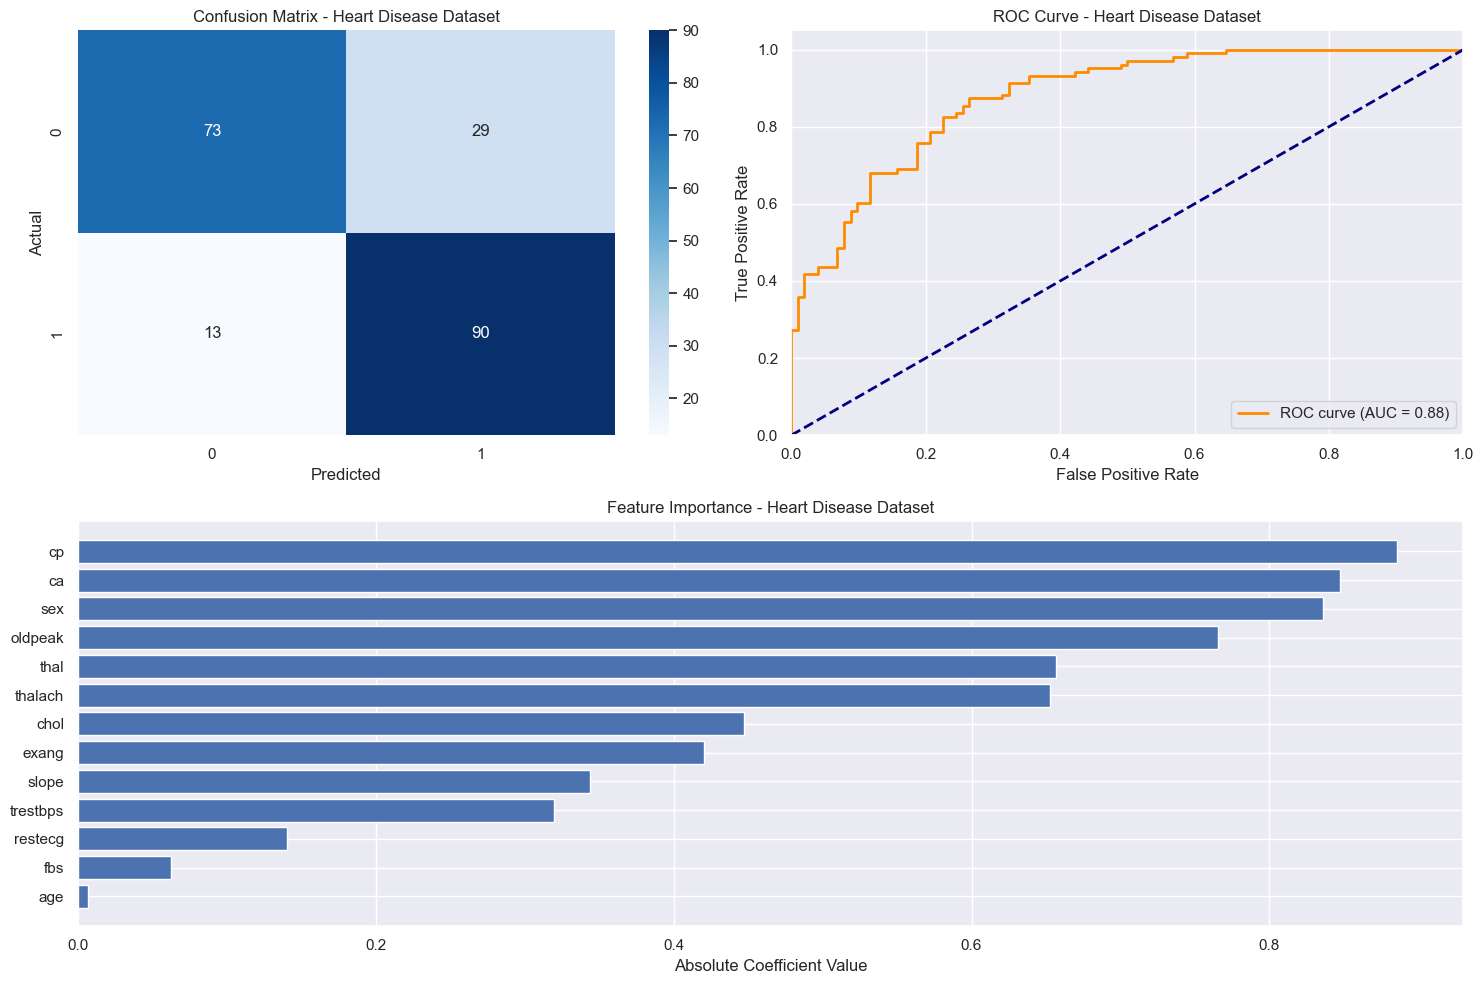


Numerical Performance Metrics for Heart Disease Dataset:
--------------------------------------------------

Metrics for Heart Disease Dataset:
Accuracy: 0.7951
Precision: 0.7563
Recall: 0.8738
F1 Score: 0.8108
ROC AUC: 0.7947


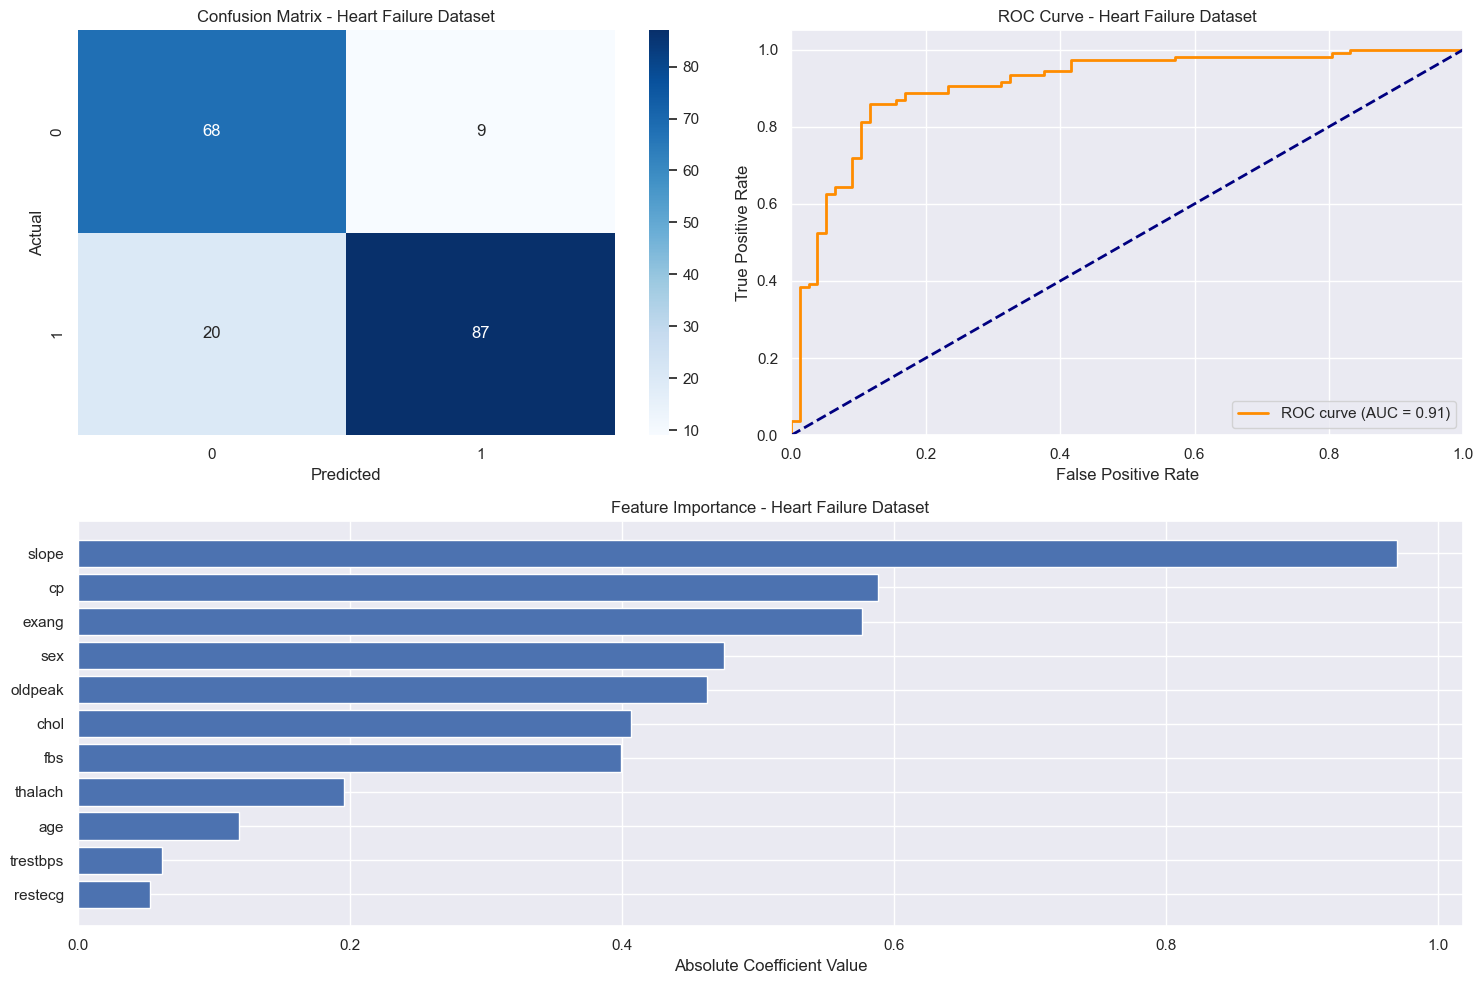


Numerical Performance Metrics for Heart Failure Dataset:
--------------------------------------------------

Metrics for Heart Failure Dataset:
Accuracy: 0.8424
Precision: 0.9062
Recall: 0.8131
F1 Score: 0.8571
ROC AUC: 0.8481


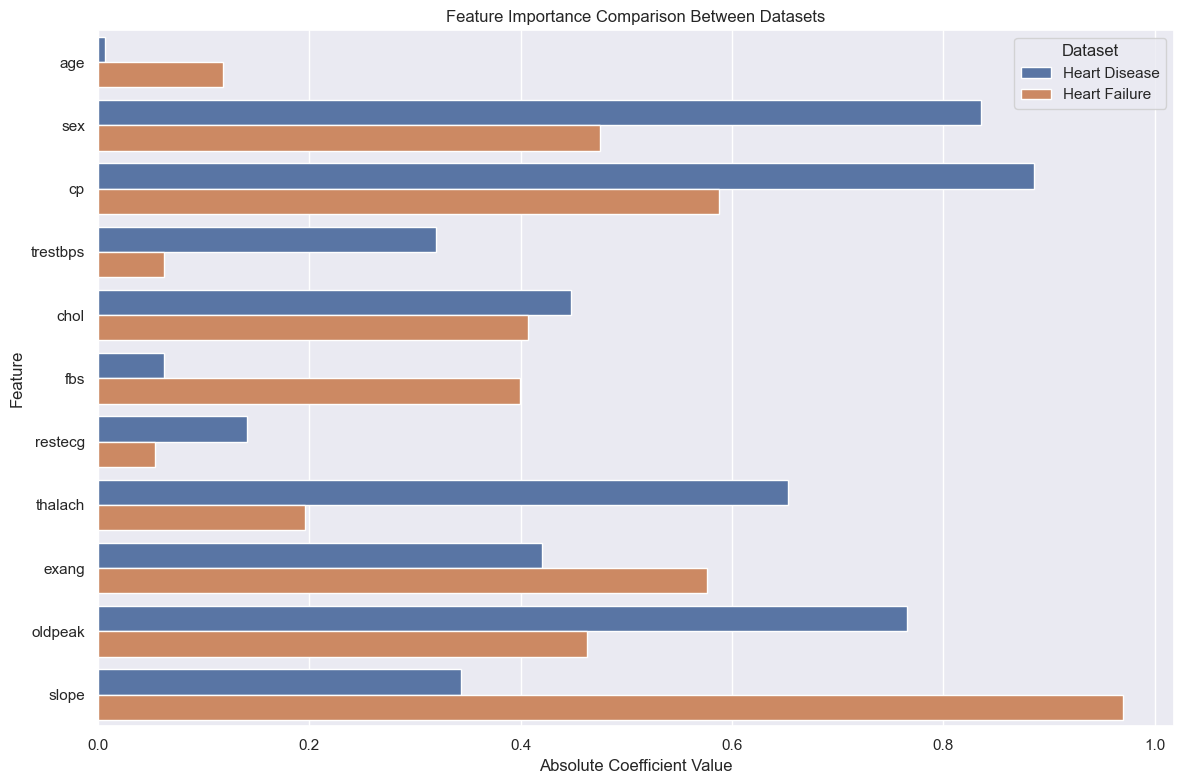


Numerical Feature Importance Comparison:
--------------------------------------------------
     Feature  Heart Disease Coef  Heart Failure Coef
2         cp            0.885835            0.587975
1        sex            0.835665            0.475230
9    oldpeak            0.765406            0.462770
7    thalach            0.652826            0.195947
4       chol            0.447276            0.406724
8      exang            0.420235            0.576675
10     slope            0.343605            0.969922
3   trestbps            0.320053            0.061943
6    restecg            0.140804            0.053446
5        fbs            0.062685            0.399377
0        age            0.006734            0.118532


In [69]:
def create_model_visualizations(X_test_scaled, y_test, y_pred, model, feature_names, dataset_name):
    # Create figure with subplots
    plt.figure(figsize=(15, 10))
    
    # 1. Confusion Matrix
    plt.subplot(2, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # 2. ROC Curve
    plt.subplot(2, 2, 2)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend(loc="lower right")
    
    # 3. Feature Importance
    plt.subplot(2, 1, 2)
    importances = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': abs(model.coef_[0])
    }).sort_values('Coefficient', ascending=True)
    
    plt.barh(range(len(importances)), importances['Coefficient'])
    plt.yticks(range(len(importances)), importances['Feature'])
    plt.title(f'Feature Importance - {dataset_name}')
    plt.xlabel('Absolute Coefficient Value')
    
    plt.tight_layout()
    plt.show()
    
    # Print numerical metrics
    print(f"\nNumerical Performance Metrics for {dataset_name}:")
    print("-" * 50)
    print_metrics(y_test, y_pred, dataset_name)

# Create separate function for feature comparison between datasets
def create_feature_comparison(model_hdisease, model_hfailure):
    # Get feature importances for both models
    hdisease_importance = pd.DataFrame({
        'Feature': X_hdisease.columns,
        'Coefficient': abs(model_hdisease.coef_[0]),
        'Dataset': 'Heart Disease'
    })

    hfailure_importance = pd.DataFrame({
        'Feature': X_hfailure.columns,
        'Coefficient': abs(model_hfailure.coef_[0]),
        'Dataset': 'Heart Failure'
    })

    # Define common features
    feature_mapping = {
        'age': 'age', 'sex': 'sex', 'cp': 'cp',
        'trestbps': 'trestbps', 'chol': 'chol',
        'fbs': 'fbs', 'restecg': 'restecg',
        'thalach': 'thalach', 'exang': 'exang',
        'oldpeak': 'oldpeak', 'slope': 'slope'
    }

    # Filter for common features
    hdisease_common = hdisease_importance[hdisease_importance['Feature'].isin(feature_mapping.keys())]
    hfailure_common = hfailure_importance[hfailure_importance['Feature'].isin(feature_mapping.keys())]

    # Create comparison plot
    plt.figure(figsize=(12, 8))
    comparison_df = pd.concat([hdisease_common, hfailure_common])
    sns.barplot(data=comparison_df, x='Coefficient', y='Feature', hue='Dataset')
    plt.title('Feature Importance Comparison Between Datasets')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

    # Print numerical comparison
    print("\nNumerical Feature Importance Comparison:")
    print("-" * 50)
    comparison_table = pd.DataFrame({
        'Feature': hdisease_common['Feature'],
        'Heart Disease Coef': hdisease_common['Coefficient'].values,
        'Heart Failure Coef': hfailure_common['Coefficient'].values
    }).sort_values('Heart Disease Coef', ascending=False)
    print(comparison_table)

# Create visualizations for both datasets
create_model_visualizations(
    X_hdisease_test_scaled, 
    y_hdisease_test, 
    y_hdisease_pred,
    logreg_hdisease,
    X_hdisease.columns,
    "Heart Disease Dataset"
)

create_model_visualizations(
    X_hfailure_test_scaled, 
    y_hfailure_test, 
    y_hfailure_pred,
    logreg_hfailure,
    X_hfailure.columns,
    "Heart Failure Dataset"
)

# Create feature comparison
create_feature_comparison(logreg_hdisease, logreg_hfailure)

### **Random Forest Model**

In [70]:
# Train Random Forest models for both datasets
# Using the same scaled data from logistic regression implementation for consistency

# Create and train Random Forest for Heart Disease dataset
rf_hdisease = RandomForestClassifier(random_state=42)
rf_hdisease.fit(X_hdisease_train_scaled, y_hdisease_train)

# Create and train Random Forest for Heart Failure dataset
rf_hfailure = RandomForestClassifier(random_state=42)
rf_hfailure.fit(X_hfailure_train_scaled, y_hfailure_train)

# Make predictions
y_hdisease_rf_pred = rf_hdisease.predict(X_hdisease_test_scaled)
y_hfailure_rf_pred = rf_hfailure.predict(X_hfailure_test_scaled)

# Calculate and print metrics for both models
print("Random Forest Results:")
print_metrics(y_hdisease_test, y_hdisease_rf_pred, "Heart Disease Dataset")
print_metrics(y_hfailure_test, y_hfailure_rf_pred, "Heart Failure Dataset")

# Get feature importance from Random Forest models
def print_rf_feature_importance(model, feature_names, dataset_name):
    importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nFeature Importance for {dataset_name}:")
    print(importances)

print_rf_feature_importance(rf_hdisease, X_hdisease.columns, "Heart Disease Dataset")
print_rf_feature_importance(rf_hfailure, X_hfailure.columns, "Heart Failure Dataset")

Random Forest Results:

Metrics for Heart Disease Dataset:
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1 Score: 0.9852
ROC AUC: 0.9854

Metrics for Heart Failure Dataset:
Accuracy: 0.8967
Precision: 0.9231
Recall: 0.8972
F1 Score: 0.9100
ROC AUC: 0.8967

Feature Importance for Heart Disease Dataset:
     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444

Feature Importance for Heart Failure Dataset:
     Feature  Importance
10     slope    0.238662
9    oldpeak    0.118325
4       chol    0.110257
8      exang    0.101832
7    thalach    0.101026
2         cp    0.096089
0        age    0.086362
3   trestbps    0.067783
1        sex    0.034684
6    restecg    0.024705
5        fbs    0.02

### **Random Forest Visualization**

Generating visualizations for Heart Disease Dataset...


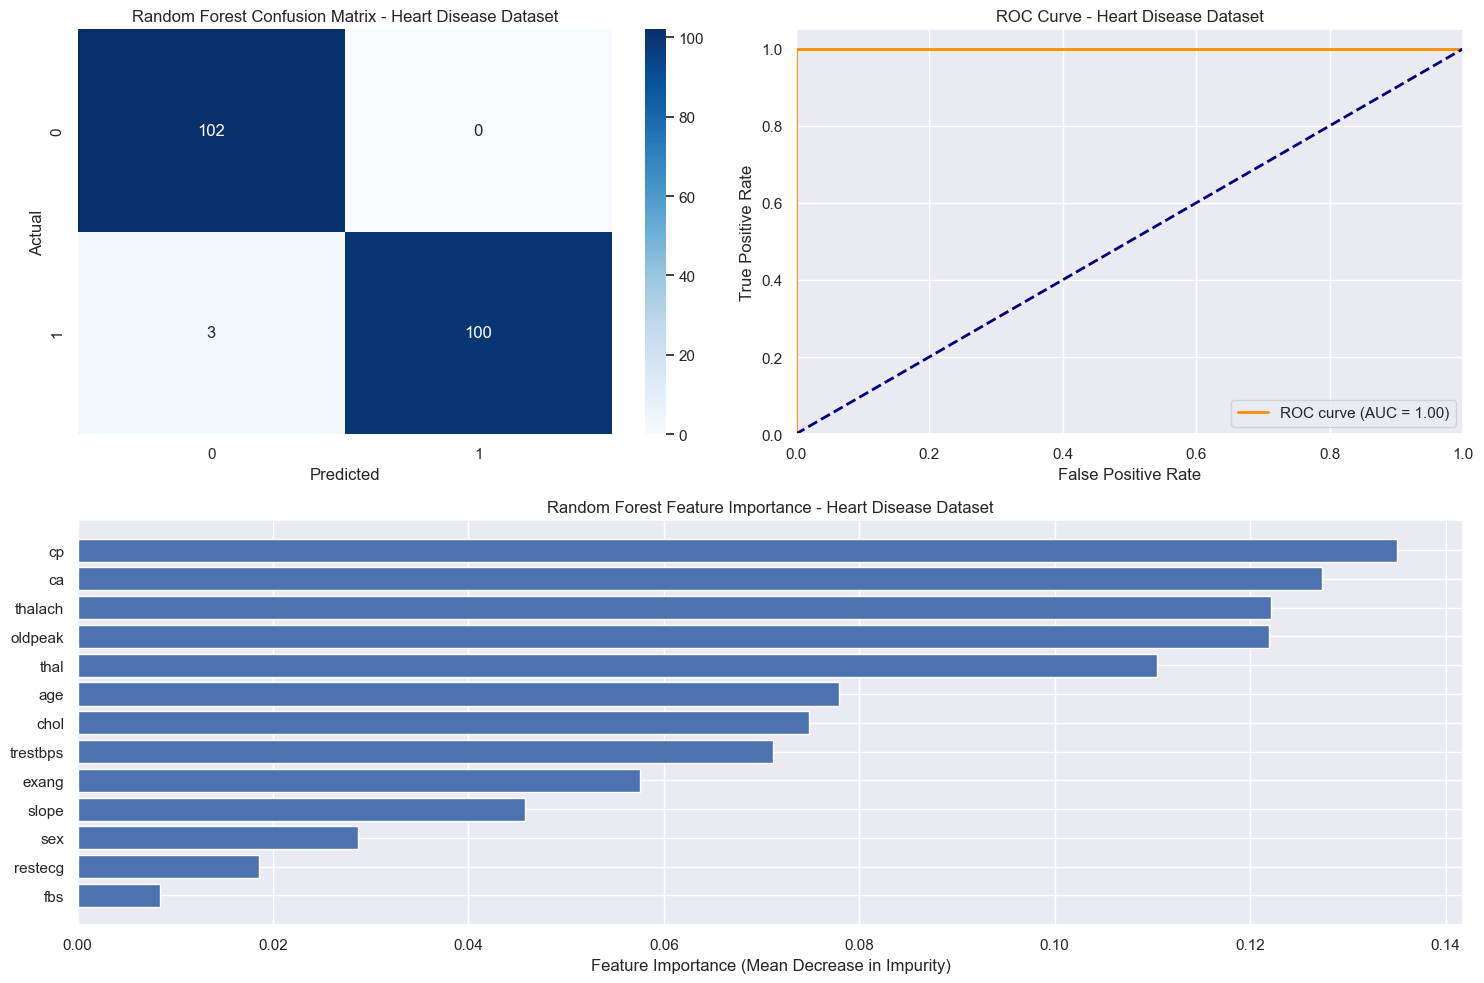


Generating visualizations for Heart Failure Dataset...


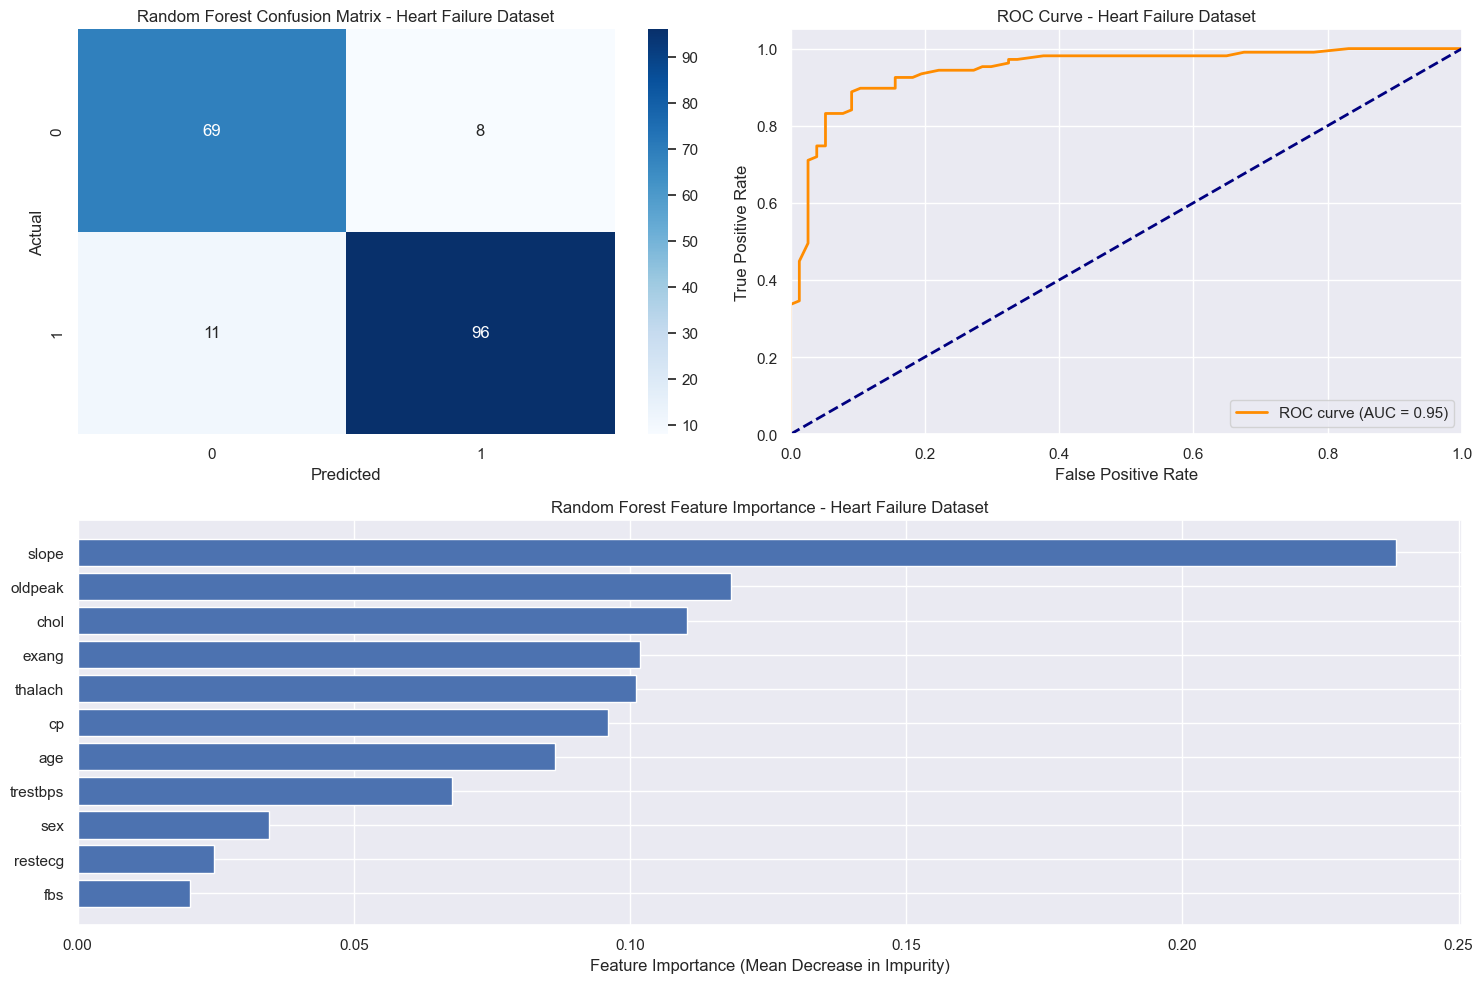


Generating feature importance comparison between datasets...


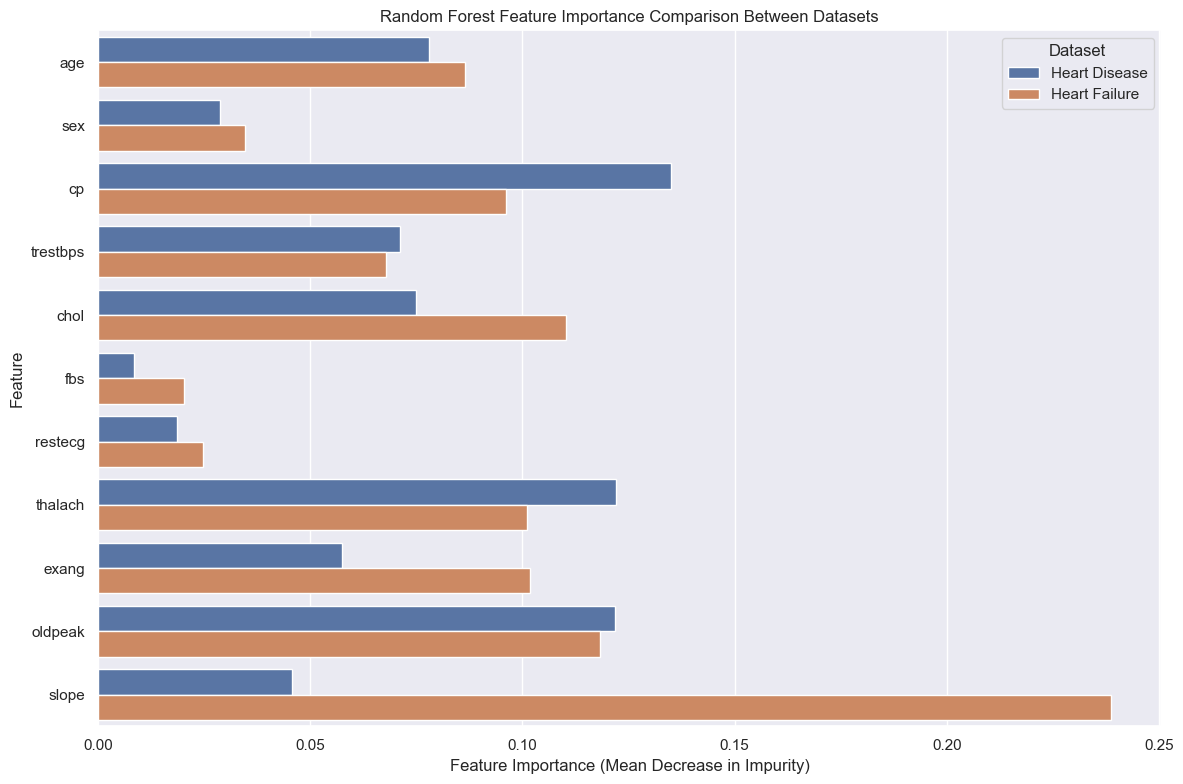


Numerical Feature Importance Comparison:
--------------------------------------------------
     Feature  Heart Disease Importance  Heart Failure Importance
2         cp                  0.135072                  0.096089
7    thalach                  0.122169                  0.101026
9    oldpeak                  0.121905                  0.118325
0        age                  0.077908                  0.086362
4       chol                  0.074822                  0.110257
3   trestbps                  0.071171                  0.067783
8      exang                  0.057594                  0.101832
10     slope                  0.045782                  0.238662
1        sex                  0.028731                  0.034684
6    restecg                  0.018557                  0.024705
5        fbs                  0.008444                  0.020276


In [71]:
# Function to create comprehensive visualizations for Random Forest results
def create_rf_visualizations(X_test_scaled, y_test, y_pred, model, feature_names, dataset_name):
    plt.figure(figsize=(15, 10))
    
    # 1. Confusion Matrix
    plt.subplot(2, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Random Forest Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # 2. ROC Curve
    plt.subplot(2, 2, 2)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend(loc="lower right")
    
    # 3. Feature Importance
    plt.subplot(2, 1, 2)
    importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.barh(range(len(importances)), importances['Importance'])
    plt.yticks(range(len(importances)), importances['Feature'])
    plt.title(f'Random Forest Feature Importance - {dataset_name}')
    plt.xlabel('Feature Importance (Mean Decrease in Impurity)')
    
    plt.tight_layout()
    plt.show()

# Create comparison visualization for feature importance between datasets
def create_rf_feature_comparison():
    # Get feature importances
    hdisease_importance = pd.DataFrame({
        'Feature': X_hdisease.columns,
        'Importance': rf_hdisease.feature_importances_,
        'Dataset': 'Heart Disease'
    })

    hfailure_importance = pd.DataFrame({
        'Feature': X_hfailure.columns,
        'Importance': rf_hfailure.feature_importances_,
        'Dataset': 'Heart Failure'
    })

    # Filter for common features
    common_features = set(hdisease_importance['Feature']).intersection(set(hfailure_importance['Feature']))
    hdisease_common = hdisease_importance[hdisease_importance['Feature'].isin(common_features)]
    hfailure_common = hfailure_importance[hfailure_importance['Feature'].isin(common_features)]

    # Combine datasets
    comparison_df = pd.concat([hdisease_common, hfailure_common])

    # Create comparison plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=comparison_df, x='Importance', y='Feature', hue='Dataset')
    plt.title('Random Forest Feature Importance Comparison Between Datasets')
    plt.xlabel('Feature Importance (Mean Decrease in Impurity)')
    plt.ylabel('Feature')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

    # Print numerical comparison
    print("\nNumerical Feature Importance Comparison:")
    print("-" * 50)
    comparison_table = pd.DataFrame({
        'Feature': hdisease_common['Feature'],
        'Heart Disease Importance': hdisease_common['Importance'].values,
        'Heart Failure Importance': hfailure_common['Importance'].values
    }).sort_values('Heart Disease Importance', ascending=False)
    print(comparison_table)

# Generate all visualizations
print("Generating visualizations for Heart Disease Dataset...")
create_rf_visualizations(
    X_hdisease_test_scaled, 
    y_hdisease_test, 
    y_hdisease_rf_pred,
    rf_hdisease,
    X_hdisease.columns,
    "Heart Disease Dataset"
)

print("\nGenerating visualizations for Heart Failure Dataset...")
create_rf_visualizations(
    X_hfailure_test_scaled, 
    y_hfailure_test, 
    y_hfailure_rf_pred,
    rf_hfailure,
    X_hfailure.columns,
    "Heart Failure Dataset"
)

print("\nGenerating feature importance comparison between datasets...")
create_rf_feature_comparison()

### **KNN Model**

In [72]:
# Create and train KNN models for both datasets
# Using the same scaled data from our previous implementations

# Create and train KNN for Heart Disease dataset
knn_hdisease = KNeighborsClassifier()
knn_hdisease.fit(X_hdisease_train_scaled, y_hdisease_train)

# Create and train KNN for Heart Failure dataset
knn_hfailure = KNeighborsClassifier()
knn_hfailure.fit(X_hfailure_train_scaled, y_hfailure_train)

# Make predictions
y_hdisease_knn_pred = knn_hdisease.predict(X_hdisease_test_scaled)
y_hfailure_knn_pred = knn_hfailure.predict(X_hfailure_test_scaled)

# Calculate and print metrics for both models
print("K-Nearest Neighbors Results:")
print_metrics(y_hdisease_test, y_hdisease_knn_pred, "Heart Disease Dataset")
print_metrics(y_hfailure_test, y_hfailure_knn_pred, "Heart Failure Dataset")

K-Nearest Neighbors Results:

Metrics for Heart Disease Dataset:
Accuracy: 0.8341
Precision: 0.8000
Recall: 0.8932
F1 Score: 0.8440
ROC AUC: 0.8339

Metrics for Heart Failure Dataset:
Accuracy: 0.8478
Precision: 0.8990
Recall: 0.8318
F1 Score: 0.8641
ROC AUC: 0.8510


### **KNN Visualization**

Generating visualizations for Heart Disease Dataset...


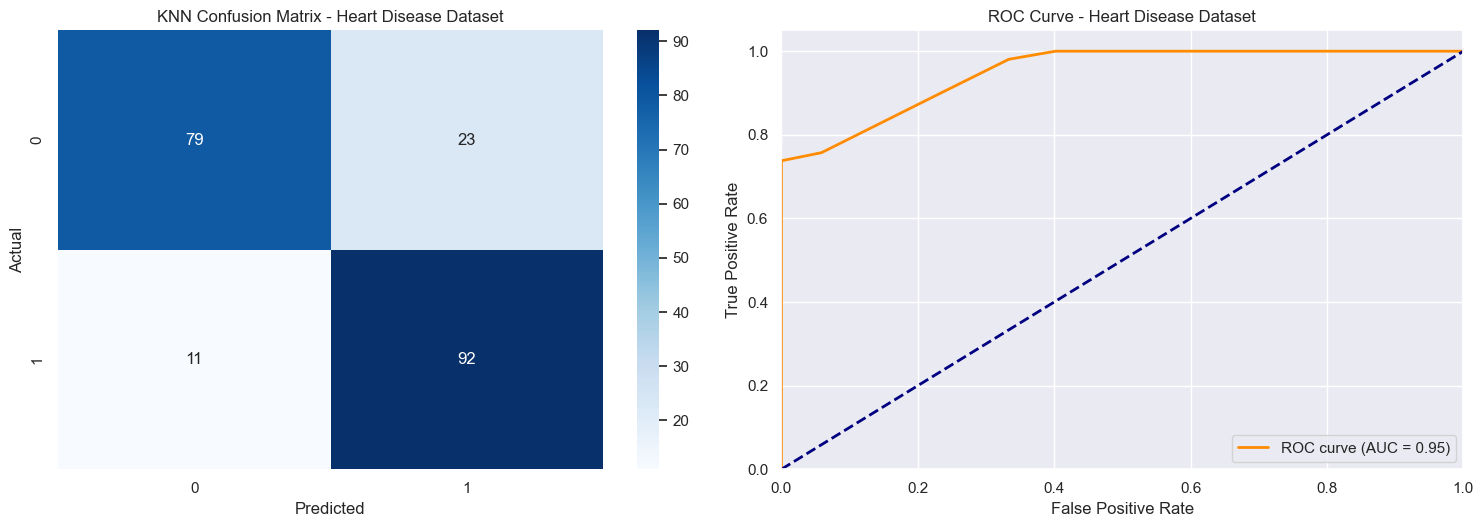


Generating visualizations for Heart Failure Dataset...


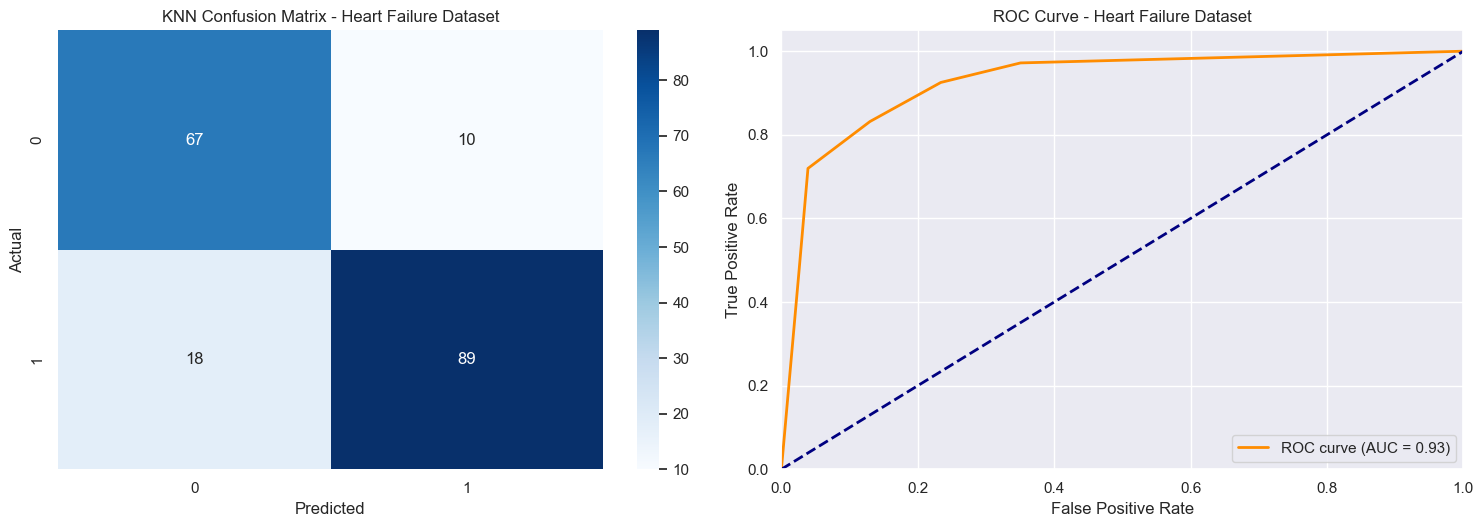

In [73]:
# Function to create visualizations for KNN results
def create_knn_visualizations(X_train_scaled, X_test_scaled, y_train, y_test, y_pred, model, dataset_name):
    plt.figure(figsize=(15, 10))
    
    # 1. Confusion Matrix
    plt.subplot(2, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'KNN Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # 2. ROC Curve
    plt.subplot(2, 2, 2)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

# Generate all visualizations
print("Generating visualizations for Heart Disease Dataset...")
create_knn_visualizations(
    X_hdisease_train_scaled,
    X_hdisease_test_scaled,
    y_hdisease_train,
    y_hdisease_test,
    y_hdisease_knn_pred,
    knn_hdisease,
    "Heart Disease Dataset"
)

print("\nGenerating visualizations for Heart Failure Dataset...")
create_knn_visualizations(
    X_hfailure_train_scaled,
    X_hfailure_test_scaled,
    y_hfailure_train,
    y_hfailure_test,
    y_hfailure_knn_pred,
    knn_hfailure,
    "Heart Failure Dataset"
)


### **Model Comparisons**

In [74]:
# Function to get all model predictions and probabilities
def get_model_predictions():
    # Dictionary to store all predictions and probabilities
    predictions = {
        'Heart Disease Dataset': {
            'Logistic Regression': {
                'pred': logreg_hdisease.predict(X_hdisease_test_scaled),
                'prob': logreg_hdisease.predict_proba(X_hdisease_test_scaled)[:,1],
                'model': logreg_hdisease
            },
            'Random Forest': {
                'pred': rf_hdisease.predict(X_hdisease_test_scaled),
                'prob': rf_hdisease.predict_proba(X_hdisease_test_scaled)[:,1],
                'model': rf_hdisease
            },
            'KNN': {
                'pred': knn_hdisease.predict(X_hdisease_test_scaled),
                'prob': knn_hdisease.predict_proba(X_hdisease_test_scaled)[:,1],
                'model': knn_hdisease
            }
        },
        'Heart Failure Dataset': {
            'Logistic Regression': {
                'pred': logreg_hfailure.predict(X_hfailure_test_scaled),
                'prob': logreg_hfailure.predict_proba(X_hfailure_test_scaled)[:,1],
                'model': logreg_hfailure
            },
            'Random Forest': {
                'pred': rf_hfailure.predict(X_hfailure_test_scaled),
                'prob': rf_hfailure.predict_proba(X_hfailure_test_scaled)[:,1],
                'model': rf_hfailure
            },
            'KNN': {
                'pred': knn_hfailure.predict(X_hfailure_test_scaled),
                'prob': knn_hfailure.predict_proba(X_hfailure_test_scaled)[:,1],
                'model': knn_hfailure
            }
        }
    }
    return predictions

# Get all predictions
all_predictions = get_model_predictions()

# Create comparison table of metrics
def create_comparison_table(dataset_name, y_test):
    metrics_dict = {}
    for model_name, model_data in all_predictions[dataset_name].items():
        metrics_dict[model_name] = {
            'Accuracy': accuracy_score(y_test, model_data['pred']),
            'Precision': precision_score(y_test, model_data['pred']),
            'Recall': recall_score(y_test, model_data['pred']),
            'F1': f1_score(y_test, model_data['pred']),
            'ROC AUC': roc_auc_score(y_test, model_data['prob'])
        }
    return pd.DataFrame(metrics_dict).round(4)

# Print comparison tables for both datasets
print("Heart Disease Dataset Model Comparison:")
print(create_comparison_table('Heart Disease Dataset', y_hdisease_test))
print("\nHeart Failure Dataset Model Comparison:")
print(create_comparison_table('Heart Failure Dataset', y_hfailure_test))

Heart Disease Dataset Model Comparison:
           Logistic Regression  Random Forest     KNN
Accuracy                0.7951         0.9854  0.8341
Precision               0.7563         1.0000  0.8000
Recall                  0.8738         0.9709  0.8932
F1                      0.8108         0.9852  0.8440
ROC AUC                 0.8787         1.0000  0.9486

Heart Failure Dataset Model Comparison:
           Logistic Regression  Random Forest     KNN
Accuracy                0.8424         0.8967  0.8478
Precision               0.9062         0.9231  0.8990
Recall                  0.8131         0.8972  0.8318
F1                      0.8571         0.9100  0.8641
ROC AUC                 0.9079         0.9467  0.9269


### **Model Comparisons Visualizations**

Generating visualizations for Heart Disease Dataset...


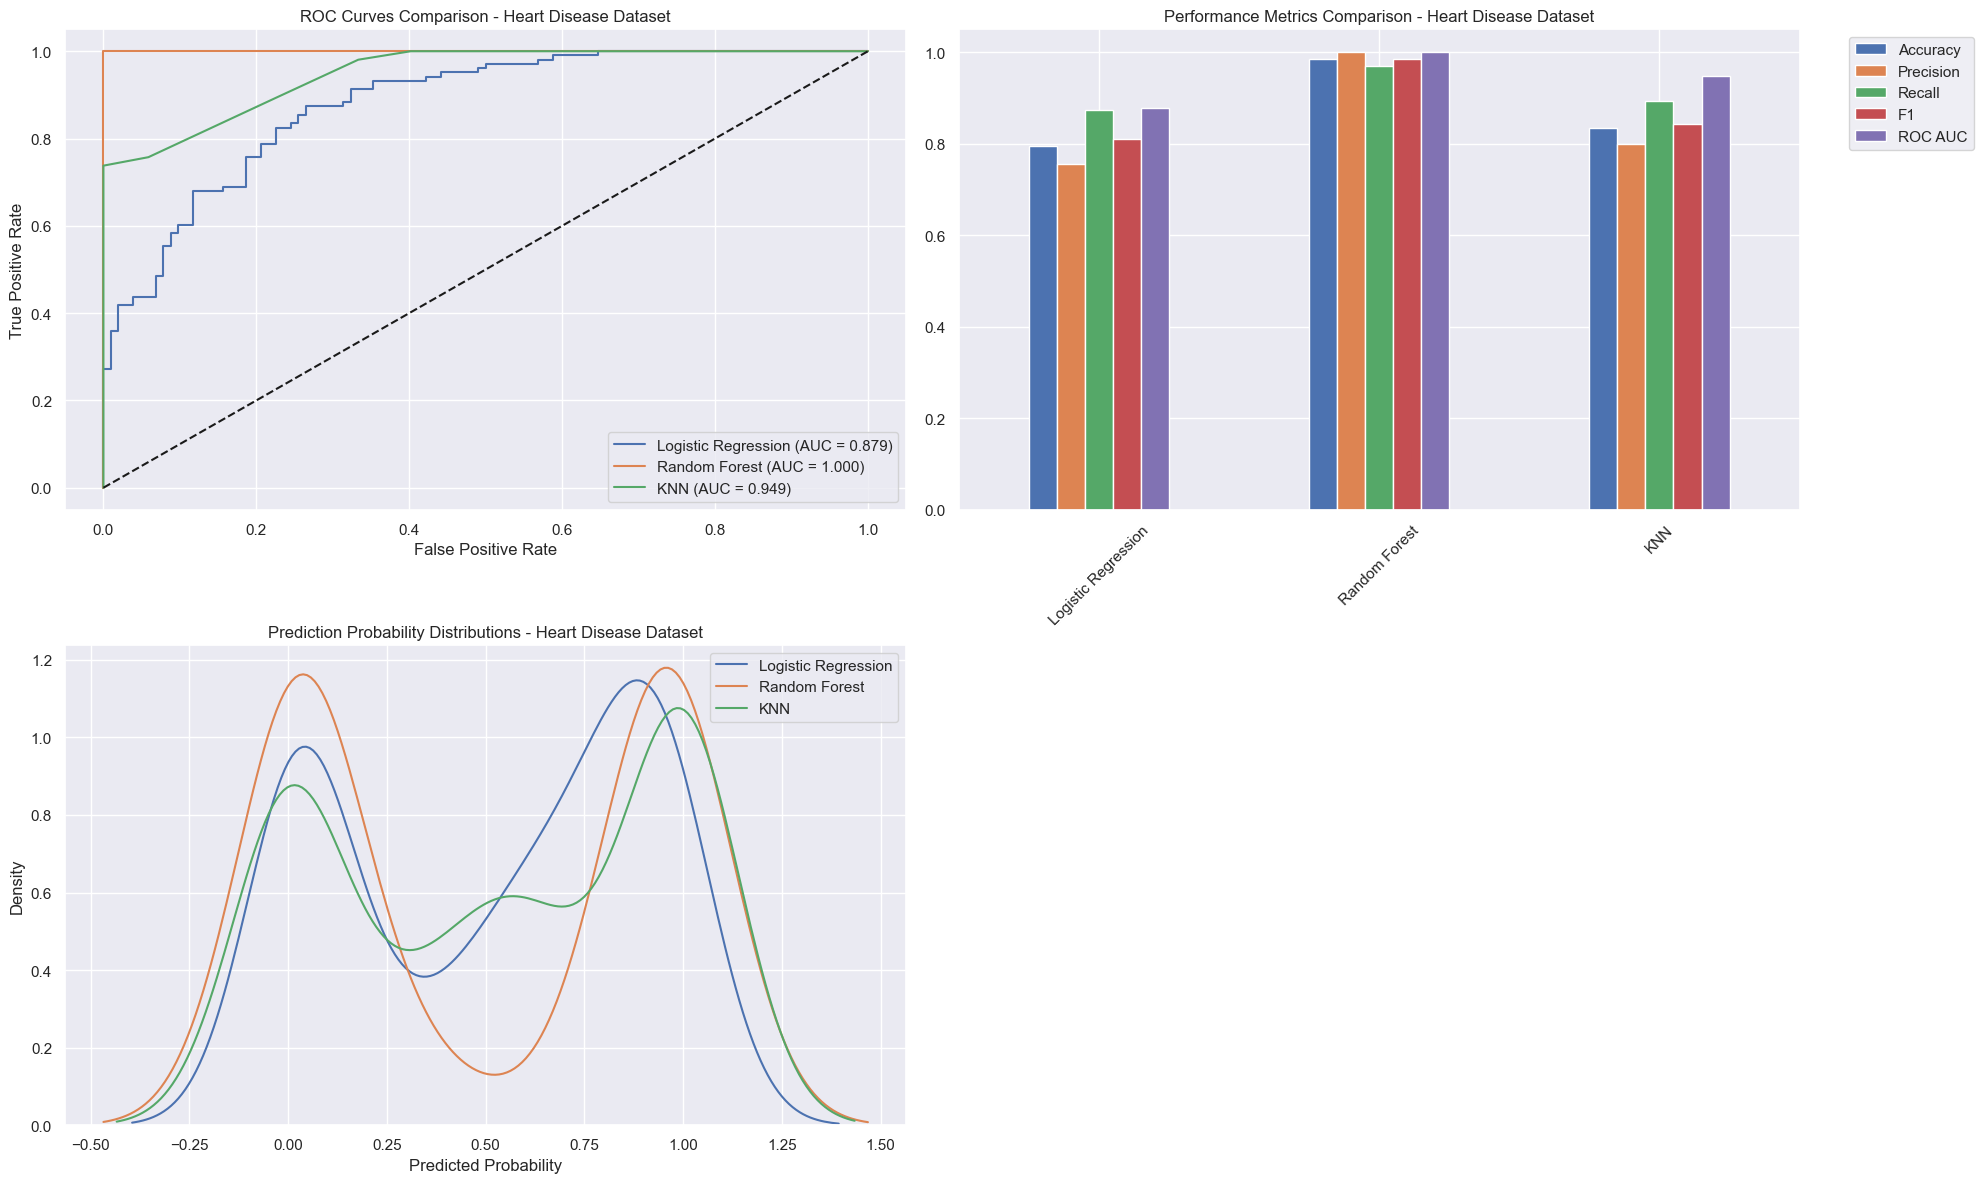

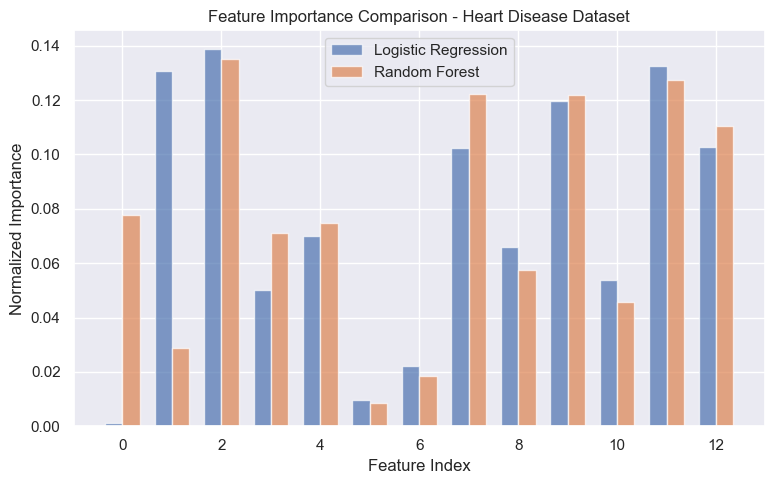


Generating visualizations for Heart Failure Dataset...


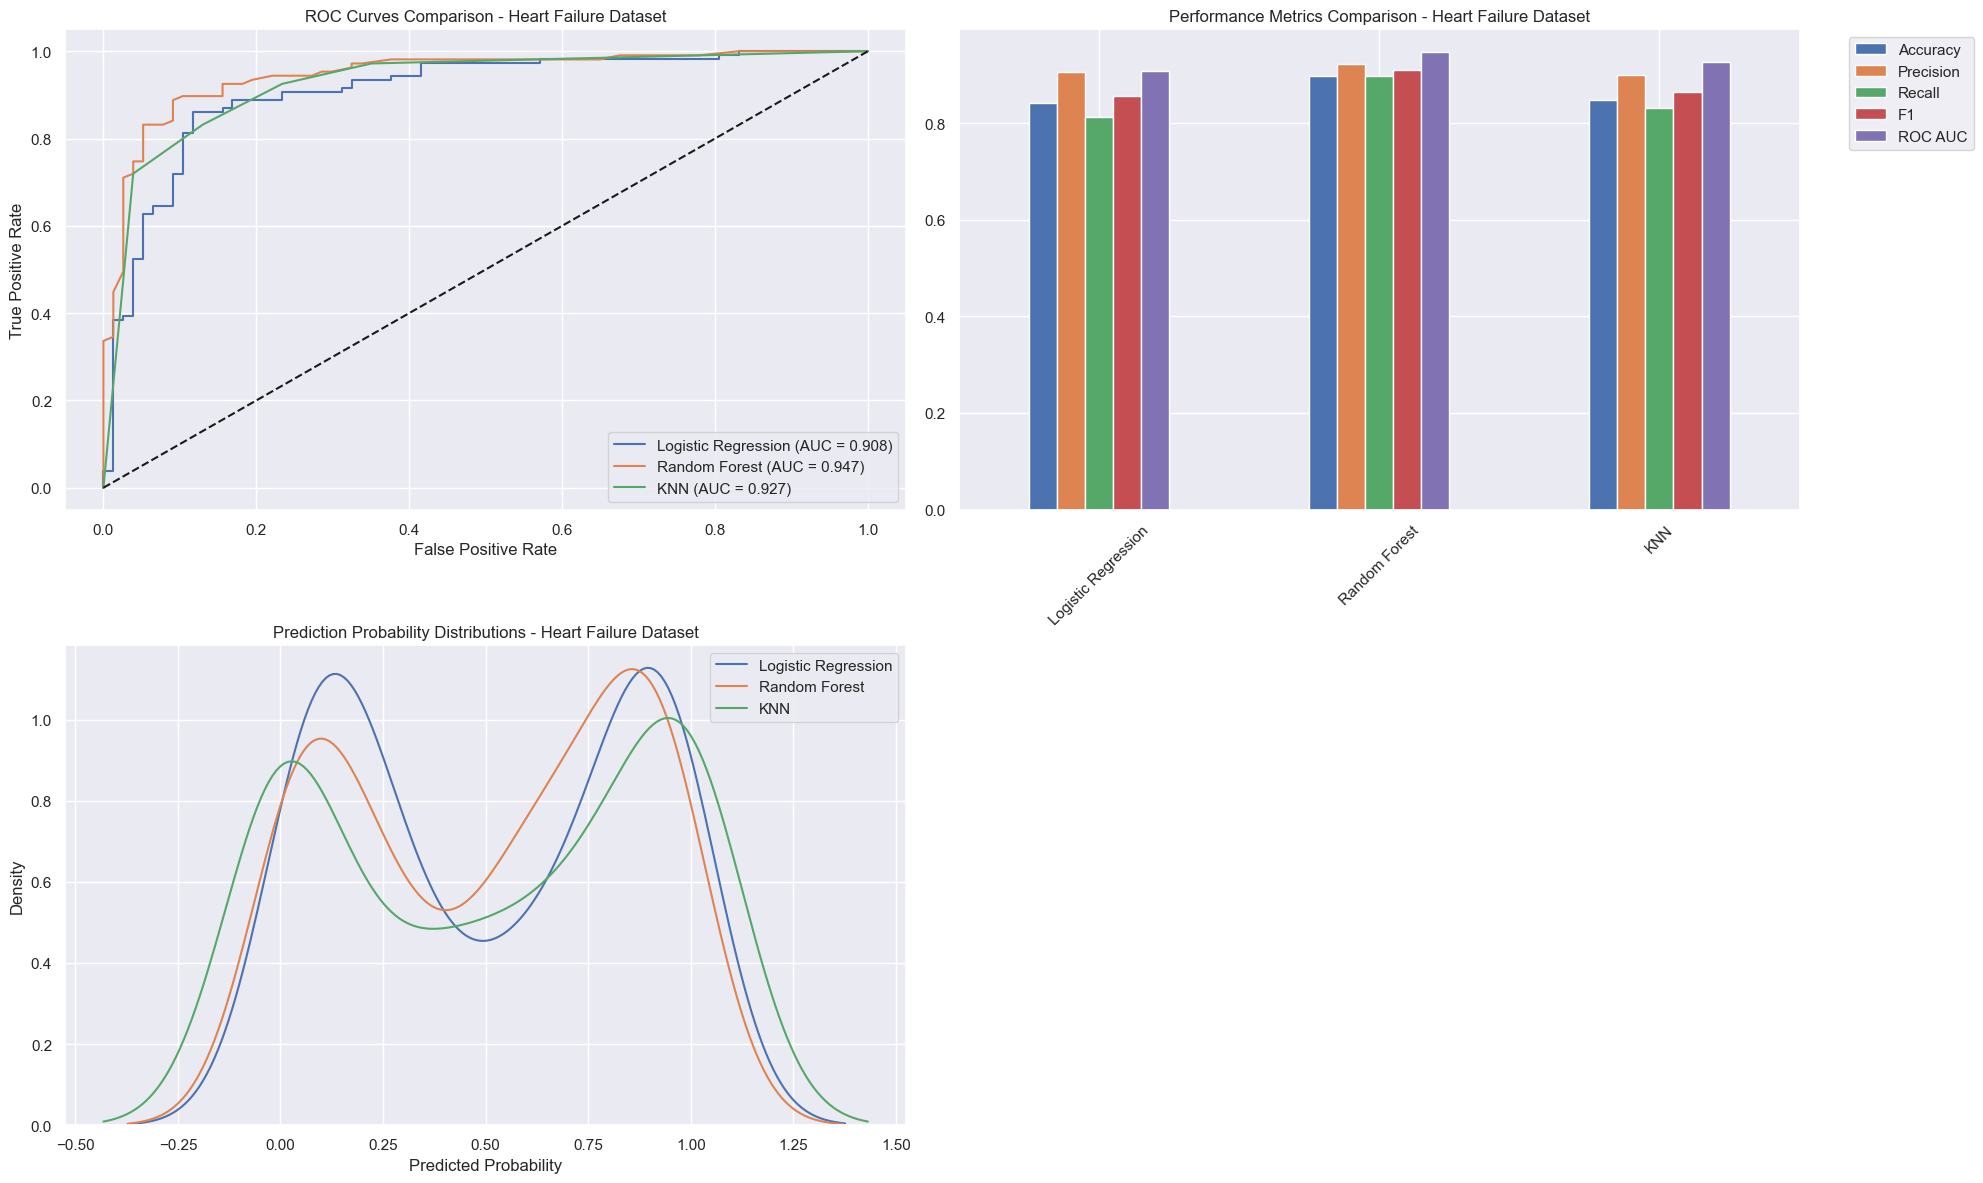

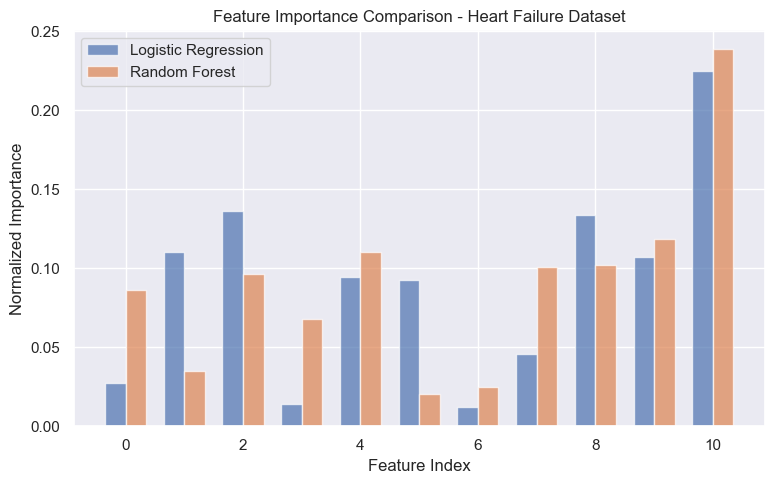

In [75]:
def create_model_comparison_visualizations(predictions, dataset_name, y_test):
    # Set up the figure
    plt.figure(figsize=(20, 12))
    
    # 1. ROC Curves Comparison
    plt.subplot(2, 2, 1)
    for model_name, model_data in predictions[dataset_name].items():
        fpr, tpr, _ = roc_curve(y_test, model_data['prob'])
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, model_data["prob"]):.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves Comparison - {dataset_name}')
    plt.legend()
    
    # 2. Performance Metrics Comparison
    plt.subplot(2, 2, 2)
    metrics_df = create_comparison_table(dataset_name, y_test)
    metrics_df.T.plot(kind='bar', ax=plt.gca())
    plt.title(f'Performance Metrics Comparison - {dataset_name}')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # 3. Prediction Probability Distributions
    plt.subplot(2, 2, 3)
    for model_name, model_data in predictions[dataset_name].items():
        sns.kdeplot(model_data['prob'], label=model_name)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title(f'Prediction Probability Distributions - {dataset_name}')
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()

    # Additional visualization: Error Analysis
    plt.figure(figsize=(15, 5))
    
    # Plot feature importance/coefficients comparison
    plt.subplot(1, 2, 2)
    
    # Get feature importance/coefficients for each model
    importance_dict = {}
    feature_names = (X_hdisease_test_scaled if dataset_name == 'Heart Disease Dataset' 
                    else X_hfailure_test_scaled).shape[1]
    
    # Logistic Regression coefficients
    lr_importance = abs(predictions[dataset_name]['Logistic Regression']['model'].coef_[0])
    importance_dict['Logistic Regression'] = lr_importance / np.sum(lr_importance)
    
    # Random Forest feature importance
    rf_importance = predictions[dataset_name]['Random Forest']['model'].feature_importances_
    importance_dict['Random Forest'] = rf_importance
    
    # Create plot
    x = np.arange(feature_names)
    width = 0.35
    
    plt.bar(x - width/2, importance_dict['Logistic Regression'], width, 
            label='Logistic Regression', alpha=0.7)
    plt.bar(x + width/2, importance_dict['Random Forest'], width, 
            label='Random Forest', alpha=0.7)
    
    plt.xlabel('Feature Index')
    plt.ylabel('Normalized Importance')
    plt.title(f'Feature Importance Comparison - {dataset_name}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Generate visualizations for both datasets
print("Generating visualizations for Heart Disease Dataset...")
create_model_comparison_visualizations(all_predictions, 'Heart Disease Dataset', y_hdisease_test)

print("\nGenerating visualizations for Heart Failure Dataset...")
create_model_comparison_visualizations(all_predictions, 'Heart Failure Dataset', y_hfailure_test)

### Feature Engineering: Testing Random Forest Optimizations vs KNN Optimizations
Random Forest and KNN were the two best performing models. Perform feature engineering and compare the two after finding the ideal parameters for each to see which is better. 

In [76]:
# KNN Parameter Tuning
k_values = range(1, 31, 2)  # Testing odd k values from 1 to 30
weights_options = ['uniform', 'distance']  # Testing different weight functions

# Dictionary to store KNN results
knn_results = {
    'Heart Disease': {'k': [], 'weights': [], 'accuracy': []},
    'Heart Failure': {'k': [], 'weights': [], 'accuracy': []}
}

# Test different KNN parameters
for k in k_values:
    for weights in weights_options:
        # Heart Disease Dataset
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_hdisease_train_scaled, y_hdisease_train)
        accuracy = knn.score(X_hdisease_test_scaled, y_hdisease_test)
        knn_results['Heart Disease']['k'].append(k)
        knn_results['Heart Disease']['weights'].append(weights)
        knn_results['Heart Disease']['accuracy'].append(accuracy)
        
        # Heart Failure Dataset
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_hfailure_train_scaled, y_hfailure_train)
        accuracy = knn.score(X_hfailure_test_scaled, y_hfailure_test)
        knn_results['Heart Failure']['k'].append(k)
        knn_results['Heart Failure']['weights'].append(weights)
        knn_results['Heart Failure']['accuracy'].append(accuracy)

# Random Forest Parameter Tuning
n_estimators_range = [50, 100, 200, 300]
max_depth_range = [None, 5, 10, 15, 20]
min_samples_split_range = [2, 5, 10]

# Dictionary to store Random Forest results
rf_results = {
    'Heart Disease': {'n_estimators': [], 'max_depth': [], 
                     'min_samples_split': [], 'accuracy': []},
    'Heart Failure': {'n_estimators': [], 'max_depth': [], 
                     'min_samples_split': [], 'accuracy': []}
}

# Test different Random Forest parameters
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            # Heart Disease Dataset
            rf = RandomForestClassifier(n_estimators=n_estimators, 
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      random_state=42)
            rf.fit(X_hdisease_train_scaled, y_hdisease_train)
            accuracy = rf.score(X_hdisease_test_scaled, y_hdisease_test)
            rf_results['Heart Disease']['n_estimators'].append(n_estimators)
            rf_results['Heart Disease']['max_depth'].append(max_depth)
            rf_results['Heart Disease']['min_samples_split'].append(min_samples_split)
            rf_results['Heart Disease']['accuracy'].append(accuracy)
            
            # Heart Failure Dataset
            rf = RandomForestClassifier(n_estimators=n_estimators, 
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      random_state=42)
            rf.fit(X_hfailure_train_scaled, y_hfailure_train)
            accuracy = rf.score(X_hfailure_test_scaled, y_hfailure_test)
            rf_results['Heart Failure']['n_estimators'].append(n_estimators)
            rf_results['Heart Failure']['max_depth'].append(max_depth)
            rf_results['Heart Failure']['min_samples_split'].append(min_samples_split)
            rf_results['Heart Failure']['accuracy'].append(accuracy)

# Find best parameters for each model and dataset
for dataset in ['Heart Disease', 'Heart Failure']:
    # KNN best parameters
    best_knn_idx = np.argmax(knn_results[dataset]['accuracy'])
    print(f"\nBest KNN parameters for {dataset} Dataset:")
    print(f"k: {knn_results[dataset]['k'][best_knn_idx]}")
    print(f"weights: {knn_results[dataset]['weights'][best_knn_idx]}")
    print(f"accuracy: {knn_results[dataset]['accuracy'][best_knn_idx]:.4f}")
    
    # Random Forest best parameters
    best_rf_idx = np.argmax(rf_results[dataset]['accuracy'])
    print(f"\nBest Random Forest parameters for {dataset} Dataset:")
    print(f"n_estimators: {rf_results[dataset]['n_estimators'][best_rf_idx]}")
    print(f"max_depth: {rf_results[dataset]['max_depth'][best_rf_idx]}")
    print(f"min_samples_split: {rf_results[dataset]['min_samples_split'][best_rf_idx]}")
    print(f"accuracy: {rf_results[dataset]['accuracy'][best_rf_idx]:.4f}")


Best KNN parameters for Heart Disease Dataset:
k: 5
weights: distance
accuracy: 1.0000

Best Random Forest parameters for Heart Disease Dataset:
n_estimators: 50
max_depth: None
min_samples_split: 2
accuracy: 0.9854

Best KNN parameters for Heart Failure Dataset:
k: 23
weights: uniform
accuracy: 0.8533

Best Random Forest parameters for Heart Failure Dataset:
n_estimators: 300
max_depth: None
min_samples_split: 5
accuracy: 0.9022


### **Best Model for each Datatest**

In [77]:
# Best models for each dataset
# Heart Disease Dataset - KNN with k=5 weights=distance
best_knn_hdisease = KNeighborsClassifier(n_neighbors=5, weights="distance")
best_knn_hdisease.fit(X_hdisease_train_scaled, y_hdisease_train)
y_hdisease_pred = best_knn_hdisease.predict(X_hdisease_test_scaled)

# Heart Failure Dataset - Random Forest with optimized parameters
best_rf_hfailure = RandomForestClassifier(n_estimators=300, max_depth=None, 
                                         min_samples_split=5, random_state=42)
best_rf_hfailure.fit(X_hfailure_train_scaled, y_hfailure_train)
y_hfailure_pred = best_rf_hfailure.predict(X_hfailure_test_scaled)

# Print results for best models
print("Best Model Results")
print("=" * 50)

print("\nHeart Disease Dataset - KNN (k=5):")
print(f"Accuracy: {accuracy_score(y_hdisease_test, y_hdisease_pred):.4f}")
print(f"Precision: {precision_score(y_hdisease_test, y_hdisease_pred):.4f}")
print(f"Recall: {recall_score(y_hdisease_test, y_hdisease_pred):.4f}")
print(f"F1 Score: {f1_score(y_hdisease_test, y_hdisease_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_hdisease_test, y_hdisease_pred):.4f}")

print("\nHeart Failure Dataset - Random Forest:")
print(f"Accuracy: {accuracy_score(y_hfailure_test, y_hfailure_pred):.4f}")
print(f"Precision: {precision_score(y_hfailure_test, y_hfailure_pred):.4f}")
print(f"Recall: {recall_score(y_hfailure_test, y_hfailure_pred):.4f}")
print(f"F1 Score: {f1_score(y_hfailure_test, y_hfailure_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_hfailure_test, y_hfailure_pred):.4f}")

Best Model Results

Heart Disease Dataset - KNN (k=5):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Heart Failure Dataset - Random Forest:
Accuracy: 0.9022
Precision: 0.9320
Recall: 0.8972
F1 Score: 0.9143
ROC AUC: 0.9031


### **Bias Analysis**

In [78]:
# Bias Analysis for both datasets and their best models

# Function to analyze bias across different feature groups
def analyze_bias(X_test, y_test, y_pred, feature_name, feature_values, dataset_name):
    results = []
    
    for value in feature_values:
        # Get indices for this feature value
        mask = X_test[feature_name] == value
        
        if sum(mask) > 0:  # Only analyze if we have samples for this value
            group_accuracy = accuracy_score(y_test[mask], y_pred[mask])
            group_size = sum(mask)
            group_percentage = (group_size / len(y_test)) * 100
            
            results.append({
                'Value': value,
                'Size': group_size,
                'Percentage': group_percentage,
                'Accuracy': group_accuracy
            })
    
    results_df = pd.DataFrame(results)
    print(f"\nBias Analysis for {feature_name} in {dataset_name}:")
    print(results_df.round(4))
    return results_df

# Heart Disease Dataset - KNN Analysis
print("Bias Analysis for Heart Disease Dataset (KNN Model)")
print("=" * 70)

# Analyze bias across age groups
X_hdisease_test['age_group'] = pd.cut(X_hdisease_test['age'], 
                                     bins=[0, 40, 50, 60, 70, 100], 
                                     labels=['<40', '40-50', '50-60', '60-70', '>70'])
analyze_bias(X_hdisease_test, y_hdisease_test, y_hdisease_pred, 
            'age_group', X_hdisease_test['age_group'].unique(),
            'Heart Disease Dataset')

# Analyze bias across sex
analyze_bias(X_hdisease_test, y_hdisease_test, y_hdisease_pred,
            'sex', X_hdisease_test['sex'].unique(),
            'Heart Disease Dataset')

# Heart Failure Dataset - Random Forest Analysis
print("\nBias Analysis for Heart Failure Dataset (Random Forest Model)")
print("=" * 70)

# Analyze bias across age groups
X_hfailure_test['age_group'] = pd.cut(X_hfailure_test['age'], 
                                     bins=[0, 40, 50, 60, 70, 100], 
                                     labels=['<40', '40-50', '50-60', '60-70', '>70'])
analyze_bias(X_hfailure_test, y_hfailure_test, y_hfailure_pred,
            'age_group', X_hfailure_test['age_group'].unique(),
            'Heart Failure Dataset')

# Analyze bias across sex
analyze_bias(X_hfailure_test, y_hfailure_test, y_hfailure_pred,
            'sex', X_hfailure_test['sex'].unique(),
            'Heart Failure Dataset')

# Additional analysis for potential confounding factors
def analyze_intersectional_bias(X_test, y_test, y_pred, dataset_name):
    print(f"\nIntersectional Analysis for {dataset_name}:")
    print("=" * 50)
    
    for age_group in X_test['age_group'].unique():
        for sex in X_test['sex'].unique():
            mask = (X_test['age_group'] == age_group) & (X_test['sex'] == sex)
            if sum(mask) > 0:
                group_acc = accuracy_score(y_test[mask], y_pred[mask])
                print(f"Age: {age_group}, Sex: {sex}")
                print(f"Group size: {sum(mask)}")
                print(f"Accuracy: {group_acc:.4f}\n")

# Perform intersectional analysis
analyze_intersectional_bias(X_hdisease_test, y_hdisease_test, y_hdisease_pred, 
                          "Heart Disease Dataset")
analyze_intersectional_bias(X_hfailure_test, y_hfailure_test, y_hfailure_pred, 
                          "Heart Failure Dataset")

Bias Analysis for Heart Disease Dataset (KNN Model)

Bias Analysis for age_group in Heart Disease Dataset:
   Value  Size  Percentage  Accuracy
0  60-70    54     26.3415       1.0
1  50-60    86     41.9512       1.0
2  40-50    52     25.3659       1.0
3    >70     4      1.9512       1.0
4    <40     9      4.3902       1.0

Bias Analysis for sex in Heart Disease Dataset:
   Value  Size  Percentage  Accuracy
0      0    66     32.1951       1.0
1      1   139     67.8049       1.0

Bias Analysis for Heart Failure Dataset (Random Forest Model)

Bias Analysis for age_group in Heart Failure Dataset:
   Value  Size  Percentage  Accuracy
0  60-70    39     21.1957    0.8974
1  50-60    74     40.2174    0.9189
2  40-50    42     22.8261    0.8810
3    <40    25     13.5870    0.9200
4    >70     4      2.1739    0.7500

Bias Analysis for sex in Heart Failure Dataset:
   Value  Size  Percentage  Accuracy
0      0    27     14.6739    0.8148
1      1   157     85.3261    0.9172

Intersecti